In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from pylab import *

from ipywidgets import *
%matplotlib widget

## Lineal:   $\; \; 10x + 5$
## Cuadratica:   $\; \; -x^2 + 75$
## Cubica:   $\; \; 2x^3 -5x^2 - 20x +12 $
## Cuadratica2:   $\; \; -\frac{5}{2}x^2 + 5x$

In [2]:
def rectTang(x,m):
    return m*x

In [3]:
def Params(funcion):
    
    if (funcion=='Cuadratica'):
        f = f1
        df = df1
        xmn = -10
        xMx = 10
        tit = "$f(x) = -x^2 + 75$"
    elif (funcion=='Cubica'):
        f = f2
        df = df2
        xmn = -3
        xMx = 5
        tit = "$f(x) = 2x^3 - 5x^2 - 20x + 12$"
    elif (funcion=='Lineal'):
        f = f0
        df = df0
        xmn = -5
        xMx = 7
        tit = "$f(x) = 10x + 5$"
    elif (funcion=='Cuadratica2'):
        f = f1B
        df = df1B
        xmn = -0.15
        xMx = 2.15
        tit = "$f(x) = -\\frac{5}{2}x^2 + 5x$"     

    return f,df,xmn,xMx,tit

In [4]:
## Lineas

def f0(x):
    return 10*x + 5

def df0(x):
        return 10

## Cuadratica

def f1(x):
    return -x**2 + 75

def df1(x):
    return -2*x

## Cuadratica2

def f1B(x):
    return -(5/2)*x**2 + 5*x 

def df1B(x):
    return -5*x + 5

# def f1C(x,r=5,K=2):
#     return r*x - (r/K)*x**2

# def df1C(x,r=5,K=2):
#     return r - 2*(r/K)*x


## Cubica

def f2(x):
    return 2*x**3 - 5*x**2 - 20*x + 12

def df2(x):
    return 6*x**2 - 10*x - 20 

interactive(children=(FloatSlider(value=1.65, description='x0', max=10.0, min=-10.0, step=0.01), Dropdown(desc…

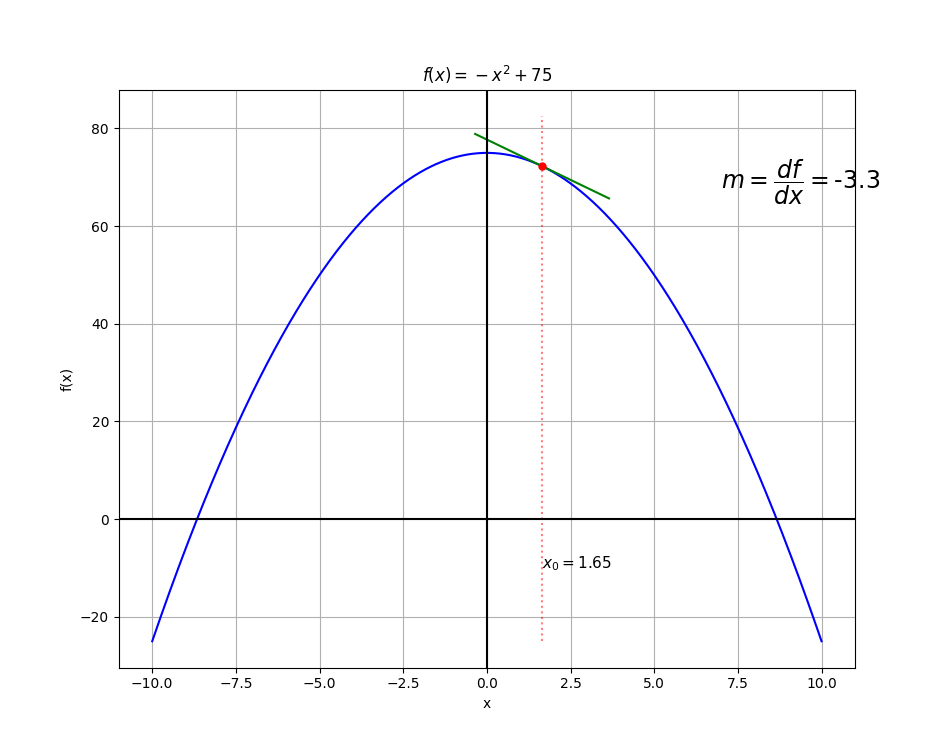

In [5]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))

@widgets.interact(x0=(-10, 10, 0.01),fun=['Lineal','Cuadratica','Cubica','Cuadratica2'],funcion=True, derivada=False)

# def update(x0=0.35,fun='Cuadratica',funcion=True, derivada=False):
def update(x0=1.65,fun='Cuadratica',funcion=True, derivada=False):    
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()

    f,df,xmn,xMx,tit = Params(fun)

    X = np.linspace(xmn,xMx,1000)
    Y = f(X)
    Y2 = df(X)

    yMx = max(Y)
    ymn = min(Y) 

    if (fun != 'Lineal'):
        yMx2= max(Y2)
        ymn2 = min(Y2)

        Sup = max(yMx,yMx2)
        Inf = min(ymn,ymn2)

    else:
        Sup = yMx
        Inf = ymn
    
    dist = abs(xMx-xmn)/10
    
    M = df(x0)
    X2 = np.linspace(-dist,dist,100)
    R = rectTang(X2,M) + f(x0)

    if (funcion):
        plt.plot(X,Y, 'b')

    if (derivada):
        if (fun=='Lineal'):
             plt.hlines(df(x0), xmn,xMx, colors = 'r')
        else:
            plt.plot(X,Y2,'r')

        plt.plot(x0,df(x0), markerfacecolor='b', markeredgecolor='b', marker='o', markersize=5, alpha=1)
        plt.hlines(df(x0), 0, x0, colors = 'b', linestyles='dashed', alpha=0.5)  

        if (abs(M) < 0.1):
            ax.text(xmn*0.1,df(x0)*1.1,str(round(df(x0))), size=11)  
        else:
             ax.text(xmn*0.1,df(x0)*1.1,str(round(M,2)), size=11)      

    
    plt.plot(X2+x0,R,'g')
    plt.plot(x0,f(x0), markerfacecolor='r', markeredgecolor='r', marker='o', markersize=5, alpha=1)

    
    if (abs(M) < 0.1):
        ax.text(xMx*(1-0.3),yMx*(1-0.1),r'$m =\dfrac{df}{dx} = $'+str(round(M)), size=17)
    else:
        ax.text(xMx*(1-0.3),yMx*(1-0.1),r'$m =\dfrac{df}{dx} = $'+str(round(M,2)), size=17)

    plt.vlines(x0, Inf, Sup*(1.1), colors = 'r', linestyles='dotted', alpha=0.5)
    ax.text(x0,-abs(yMx-ymn)*.1,r'$x_0 =$'+str(round(x0,3)), size=11)   

    plt.title(tit)
    plt.ylabel("f(x)")
    plt.xlabel("x")
    plt.axhline(y = 0.0, xmin = 0.0, color = 'black')
    plt.axvline(x = 0.0, ymin = 0.0, color = 'black')
    ax.grid(True)

## Lineal:   $\; \; 10x + 5$
## Cuadratica:   $\; \; -x^2 + 75$
## Cubica:   $\; \; 2x^3 -5x^2 - 20x +12 $
## Cuadratica2:   $\; \; -\frac{5}{2}x^2 + 5x$